__PHARML 2022 CHALLENGE - EDA SECTION__

Prognostic models have a wide-array of applications and are used in academic and clinical settings. Lung cancer is newly diagnosed in 2.3 million people per year and is divided in Non-Small Cell Lung Cancer (NSCLC) and Small Cell Lung Cancer (SCLC). NSCLC accounts for 84% of the total cases. The 5-year survival rate for patients with NSCLC is 25%, but prognosis can vary depending on many factors including demographics, clinical characteristics, and genomic mutations, among others. Survival Machine Learning models could enable us to make much better prognosis prediction, which in turn has real world clinical applications. Prognostic models could be used to help us identify the most predictive and novel biomarkers influencing the risk of mortality in NSCLC. Additionally, representations learned by fitting Survival Machine Learning models on NSCLC data could be used to stratify patients and obtain clinical clusters or phenotypes that give us insights on disease heterogeneity. Yet another promising application for these models is the potential use of covariate adjustment methods to increase the power of clinical trials and achieve significant results with fewer patients. Finally, it should be noted that there are many other potential relevant real-world applications for these methods.

__FEATURES USED:-__ 

- patientid: unique identifier for the patient
- daysto_event: Days from index (First line starting) to event or loss to follow up
- event_died: Whether the patient experienced death (1) or lost to followup (0)
- diagnosis_nsclc_year: Calendar year the patient was diagnosed with NSCLC
- diagnosis_ansclc_year: Calendar year the patient was diagnosed with aNSCLC
- ecog: Most recent ECOG score before first line treatment was started
- histology: Cancer histology
- groupstage: Cancer stage
- smokingstatus: Patient’s smoking history
- birthyear: Calendar year the patient was born in - note, for privacy reasons individuals with early birth years are merged into the 1937 group
- gender: Gender values are either “M” for male or “F” for female. Genders other than ‘M’ or ‘F’ are unavailable.
- raceethnicity: As race and ethnicity are not universally recorded, internal rules are used to combine. Data entry errors may have occurred in clinical sites.
- region: US region
- lot_category: What types of drugs were present in the first line. A value like Chemotherapy,Chemotherapy means the first line was two drugs, both being chemotherapies. Assumption made here that same drugs given if similar groupings observed for patients with same cancer histology
- biomarker_pdl1: PDL1 status if measured
- biomarker_alk: ALK status if measured
- biomarker_ros1: ROS1 status if measured
- biomarker_braf: BRAF status if measured
- biomarker_egfr: EGFR status if measured
- biomarker_kras: KRAS status if measured
- lab_creatinine: Most recent Creatinine lab before index
- lab_alanineaminotransferase: Most recent ALT lab before index
- lab_ldh: Most recent LDH lab before index
- bmi: Most recent BMI recorded before index
- index_lot1_year: Calendar year that index (first line start) occurred in
- ageAtdiagnosis: age of patient on diagnosis with cancer (dx_nsclc_year - birth_year)
- timeToprogress: time duration between initial diagnosis and prgression to advanced stage (dx_ansclc_year - dx_nsclc_year)
- TimetoTx: time duration between initial cancer diagnosis and commencement of treatment(index_lot1_year - dx_nsclc_year)
- TxtoFail: time duration between commencing treatment and progression to advanced stage (dx_ansclc_year - index_lot1_year)

In [12]:
#Define Helper function 
load_file <- function(filename) {
    #loads csv into dataframe
    return (read_csv(filename))
}
    
print(load_file)

function(filename) {
    #loads csv into dataframe
    return (read_csv(filename))
}


In [18]:
#Import Library
library(dplyr)
library(ggplot2)
library(tidyr)
library(caret)
library(lubridate)
library(purrr)
library(mgcv)
library(rpart)
library(tidyverse)
library(tidymodels)
library(utils)
library(broom)
library(ellipsis)
library(highr)
library(lattice)
library(methods)
library(nlme)
library(readr)
library(readxl)
library(stats)
library(stringr)
library(ranger)
library(tibble)
library(xgboost)
library(randomforest)
library(magrittr)
library(lubridate)
library(xts)
library(hms)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘purrr’


The following object is masked from ‘package:caret’:

    lift


Warning message:
“package ‘mgcv’ was built under R version 4.1.3”
Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.8-40. For overview type 'help("mgcv-package")'.

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ nlme::collapse()         masks dplyr::collapse()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks

ERROR: Error in library(tidymodels): there is no package called ‘tidymodels’


In [37]:
#Load in dataframe
flatiron_train <- read_csv("/pharml/data/flatiron_training.csv")

Rows: 31334 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): patientid, ecog, histology, groupstage, smokingstatus, gender, rac...
dbl  (7): daysto_event, event_died, diagnosis_nsclc_year, diagnosis_ansclc_y...
lgl  (6): biomarker_pdl1, biomarker_alk, biomarker_ros1, biomarker_braf, bio...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [38]:
head(flatiron_train)

patientid,daysto_event,event_died,diagnosis_nsclc_year,diagnosis_ansclc_year,ecog,histology,groupstage,smokingstatus,birthyear,⋯,biomarker_alk,biomarker_ros1,biomarker_braf,biomarker_egfr,biomarker_kras,lab_creatinine,lab_alanineaminotransferase,lab_ldh,bmi,index_lot1_year
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
PHARML000001,156,0,2002,2019,1,Squamous cell carcinoma,Stage IIA,History of smoking,1951,⋯,NA,NA,NA,NA,NA,normal,normal,NA,19.34262,2019
PHARML000003,190,1,2013,2014,Unknown,Non-squamous cell carcinoma,Stage IIIA,History of smoking,1946,⋯,NA,NA,NA,NA,NA,NA,normal,NA,22.41903,2014
PHARML000004,74,1,2020,2020,Unknown,Non-squamous cell carcinoma,Stage IIIC,History of smoking,1944,⋯,NA,NA,NA,NA,NA,NA,NA,NA,26.63880,2020
PHARML000008,52,1,2020,2020,1,Non-squamous cell carcinoma,Stage IV,History of smoking,1937,⋯,NA,NA,NA,NA,NA,normal,abnormal,NA,18.94848,2020
PHARML000009,392,0,2021,2021,0,Non-squamous cell carcinoma,Stage IIIB,History of smoking,1966,⋯,NA,NA,NA,NA,NA,normal,normal,abnormal,21.33351,2021
PHARML000011,39,1,2017,2017,Unknown,Non-squamous cell carcinoma,Stage IV,History of smoking,1943,⋯,NA,NA,NA,NA,NA,normal,normal,normal,16.65117,2017


In [39]:
summary(flatiron_train)

  patientid          daysto_event      event_died     diagnosis_nsclc_year
 Length:31334       Min.   :   1.0   Min.   :0.0000   Min.   :1990        
 Class :character   1st Qu.: 112.0   1st Qu.:0.0000   1st Qu.:2014        
 Mode  :character   Median : 280.0   Median :1.0000   Median :2016        
                    Mean   : 484.2   Mean   :0.7273   Mean   :2016        
                    3rd Qu.: 639.0   3rd Qu.:1.0000   3rd Qu.:2019        
                    Max.   :3948.0   Max.   :1.0000   Max.   :2022        
                                                      NA's   :5           
 diagnosis_ansclc_year     ecog            histology          groupstage       
 Min.   :2011          Length:31334       Length:31334       Length:31334      
 1st Qu.:2014          Class :character   Class :character   Class :character  
 Median :2017          Mode  :character   Mode  :character   Mode  :character  
 Mean   :2016                                                                  


In [49]:
#Include in new columns - age at diagnosis, time to progress to advanced cancer & time to start treatment
flatiron_train <- flatiron_train %>% mutate(ageAtdiagnosis = diagnosis_nsclc_year - birthyear, 
    yrsToprogress = diagnosis_ansclc_year - diagnosis_nsclc_year, 
                                              TimetoTx = index_lot1_year - diagnosis_nsclc_year)
head(flatiron_train)

patientid,daysto_event,event_died,diagnosis_nsclc_year,diagnosis_ansclc_year,ecog,histology,groupstage,smokingstatus,birthyear,⋯,biomarker_egfr,biomarker_kras,lab_creatinine,lab_alanineaminotransferase,lab_ldh,bmi,index_lot1_year,ageAtdiagnosis,yrsToprogress,TimetoTx
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<lgl>,<lgl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PHARML000001,156,0,2002,2019,1,Squamous cell carcinoma,Stage IIA,History of smoking,1951,⋯,NA,NA,normal,normal,NA,19.34262,2019,51,17,17
PHARML000003,190,1,2013,2014,Unknown,Non-squamous cell carcinoma,Stage IIIA,History of smoking,1946,⋯,NA,NA,NA,normal,NA,22.41903,2014,67,1,1
PHARML000004,74,1,2020,2020,Unknown,Non-squamous cell carcinoma,Stage IIIC,History of smoking,1944,⋯,NA,NA,NA,NA,NA,26.63880,2020,76,0,0
PHARML000008,52,1,2020,2020,1,Non-squamous cell carcinoma,Stage IV,History of smoking,1937,⋯,NA,NA,normal,abnormal,NA,18.94848,2020,83,0,0
PHARML000009,392,0,2021,2021,0,Non-squamous cell carcinoma,Stage IIIB,History of smoking,1966,⋯,NA,NA,normal,normal,abnormal,21.33351,2021,55,0,0
PHARML000011,39,1,2017,2017,Unknown,Non-squamous cell carcinoma,Stage IV,History of smoking,1943,⋯,NA,NA,normal,normal,normal,16.65117,2017,74,0,0


In [77]:
install.packages("naniar", "/tmp/RtmpopXkDN/downloaded_packages")

also installing the dependencies ‘gridExtra’, ‘norm’, ‘visdat’, ‘viridis’, ‘UpSetR’




In [104]:
library("naniar", lib.loc=.libPaths("/tmp/RtmpopXkDN/downloaded_packages"))

In [120]:
#Replace 'unknown' values in ecog & smokingstatus columns with 'NA'
flatiron_train <- flatiron_train %>% replace_with_na(replace = list(ecog = "Unknown", smokingstatus = 
                "Unknown", gender = "Unknown", raceethnicity = "Unknown", region = "Unknown", 
                                                                    lot_category = "Unknown"))
head(flatiron_train)

patientid,daysto_event,event_died,diagnosis_nsclc_year,diagnosis_ansclc_year,ecog,histology,groupstage,smokingstatus,birthyear,⋯,biomarker_egfr,biomarker_kras,lab_creatinine,lab_alanineaminotransferase,lab_ldh,bmi,index_lot1_year,ageAtdiagnosis,yrsToprogress,TimetoTx
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<lgl>,<lgl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PHARML000001,156,0,2002,2019,1,Squamous cell carcinoma,Stage IIA,History of smoking,1951,⋯,NA,NA,normal,normal,NA,19.34262,2019,51,17,17
PHARML000003,190,1,2013,2014,0,Non-squamous cell carcinoma,Stage IIIA,History of smoking,1946,⋯,NA,NA,NA,normal,NA,22.41903,2014,67,1,1
PHARML000004,74,1,2020,2020,0,Non-squamous cell carcinoma,Stage IIIC,History of smoking,1944,⋯,NA,NA,NA,NA,NA,26.63880,2020,76,0,0
PHARML000008,52,1,2020,2020,1,Non-squamous cell carcinoma,Stage IV,History of smoking,1937,⋯,NA,NA,normal,abnormal,NA,18.94848,2020,83,0,0
PHARML000009,392,0,2021,2021,0,Non-squamous cell carcinoma,Stage IIIB,History of smoking,1966,⋯,NA,NA,normal,normal,abnormal,21.33351,2021,55,0,0
PHARML000011,39,1,2017,2017,0,Non-squamous cell carcinoma,Stage IV,History of smoking,1943,⋯,NA,NA,normal,normal,normal,16.65117,2017,74,0,0


In [223]:
flatiron_train1 <- flatiron_train

In [224]:
#Track missing values - to id post imputation
flatiron_sh <- bind_shadow(flatiron_train1, only_miss = TRUE)

In [225]:
head(flatiron_train1)

patientid,daysto_event,event_died,diagnosis_nsclc_year,diagnosis_ansclc_year,ecog,histology,groupstage,smokingstatus,birthyear,⋯,biomarker_egfr,biomarker_kras,lab_creatinine,lab_alanineaminotransferase,lab_ldh,bmi,index_lot1_year,ageAtdiagnosis,yrsToprogress,TimetoTx
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PHARML000001,156,0,2002,2019,1,Squamous cell carcinoma,0,0,1951,⋯,0,0,normal,normal,0,19.34262,2019,51,17,17
PHARML000003,190,1,2013,2014,0,Non-squamous cell carcinoma,1,0,1946,⋯,0,0,0,normal,0,22.41903,2014,67,1,1
PHARML000004,74,1,2020,2020,0,Non-squamous cell carcinoma,2,0,1944,⋯,0,0,0,0,0,26.63880,2020,76,0,0
PHARML000008,52,1,2020,2020,1,Non-squamous cell carcinoma,3,0,1937,⋯,0,0,normal,abnormal,0,18.94848,2020,83,0,0
PHARML000009,392,0,2021,2021,0,Non-squamous cell carcinoma,4,0,1966,⋯,0,0,normal,normal,abnormal,21.33351,2021,55,0,0
PHARML000011,39,1,2017,2017,0,Non-squamous cell carcinoma,3,0,1943,⋯,0,0,normal,normal,normal,16.65117,2017,74,0,0


#Assumption for baseline model = all NA values equal absence of disease or abnormal result = 0

In [115]:
#Check for NA values in the dataframe with 0
any_na(flatiron_train$daysto_event)
any_na(flatiron_train$event_died)
any_na(flatiron_train$ecog)
any_na(flatiron_train$histology)
any_na(flatiron_train$groupstage)
any_na(flatiron_train$smokingstatus)
any_na(flatiron_train$bmi)
any_na(flatiron_train$ageAtdiagnosis)
any_na(flatiron_train$yrsToprogress)
any_na(flatiron_train$TimetoTx)

[1] FALSE

[1] FALSE

[1] TRUE

[1] FALSE

[1] FALSE

[1] FALSE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

In [168]:
#Replace all NA values with 0
toReplace1 <- which(is.na(flatiron_train$ecog))

flatiron_train$ecog[toReplace1] <- 0

#BMI
toReplace2 <- which(is.na(flatiron_train$bmi))
flatiron_train$bmi[toReplace2] <- 0

#Age at Diagnosis
toReplace3 <- which(is.na(flatiron_train$ageAtdiagnosis))
flatiron_train$ageAtdiagnosis[toReplace3] <- 0

#yrs to progress
toReplace4 <- which(is.na(flatiron_train$yrsToprogress))
flatiron_train$yrsToprogress[toReplace4] <- 0

#Time to treatment
toReplace5 <- which(is.na(flatiron_train$TimetoTx))
flatiron_train$TimetoTx[toReplace5] <- 0

#Gender 
toReplace6 <- which(is.na(flatiron_train$gender))
flatiron_train$gender[toReplace6] <- 0

#Raceethnicity
toReplace7 <- which(is.na(flatiron_train$raceethnicity))
flatiron_train$raceethnicity[toReplace7] <- 0

#Region
toReplace8 <- which(is.na(flatiron_train$region))
flatiron_train$region[toReplace8] <- 0

#Lotcategory
toReplace9 <- which(is.na(flatiron_train$lot_category))
flatiron_train$lot_category[toReplace9] <- 0

#biomarker_pdl1
toReplace10 <- which(is.na(flatiron_train$biomarker_pdl1))
flatiron_train$biomarker_pdl1[toReplace10] <- 0

#biomarker_alk
toReplace11 <- which(is.na(flatiron_train$biomarker_alk))
flatiron_train$biomarker_alk[toReplace11] <- 0

#biomarker_egfr
toReplace12 <- which(is.na(flatiron_train$biomarker_egfr))
flatiron_train$biomarker_egfr[toReplace12] <- 0

#biomarker_kras
toReplace13 <- which(is.na(flatiron_train$biomarker_kras))
flatiron_train$biomarker_kras[toReplace13] <- 0

#biomrker_ros1
toReplace14 <- which(is.na(flatiron_train$biomarker_ros1))
flatiron_train$biomarker_ros1[toReplace14] <- 0

#lab_creatinine
toReplace15 <- which(is.na(flatiron_train$lab_creatinine))
flatiron_train$lab_creatinine[toReplace15] <- 0

#lab_alt
toReplace16 <- which(is.na(flatiron_train$lab_alanineaminotransferase))
flatiron_train$lab_alanineaminotransferase[toReplace16] <- 0

#lab_ldh
toReplace17 <- which(is.na(flatiron_train$lab_ldh))
flatiron_train$lab_ldh[toReplace17] <- 0

#biomarker_braf
toReplace18 <- which(is.na(flatiron_train$biomarker_braf))
flatiron_train$biomarker_braf[toReplace18] <- 0

In [169]:
#Select only relevant columns and check if any NA values persist

flatiron_select <- flatiron_train %>% select(daysto_event, event_died, ecog, histology, groupstage, 
        smokingstatus, gender, raceethnicity, region, lot_category, biomarker_pdl1, biomarker_egfr, 
        biomarker_alk, biomarker_ros1, biomarker_braf, biomarker_kras, lab_creatinine, 
        lab_alanineaminotransferase, lab_ldh, bmi, ageAtdiagnosis, yrsToprogress, TimetoTx)                                       

In [170]:
head(flatiron_select)

daysto_event,event_died,ecog,histology,groupstage,smokingstatus,gender,raceethnicity,region,lot_category,⋯,biomarker_ros1,biomarker_braf,biomarker_kras,lab_creatinine,lab_alanineaminotransferase,lab_ldh,bmi,ageAtdiagnosis,yrsToprogress,TimetoTx
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
156,0,1,Squamous cell carcinoma,Stage IIA,History of smoking,M,Hispanic or Latino (any),South,"Chemotherapy,Chemotherapy,Immunotherapy",⋯,0,0,0,normal,normal,0,19.34262,51,17,17
190,1,0,Non-squamous cell carcinoma,Stage IIIA,History of smoking,F,Hispanic or Latino (any),Midwest,Chemotherapy,⋯,0,0,0,0,normal,0,22.41903,67,1,1
74,1,0,Non-squamous cell carcinoma,Stage IIIC,History of smoking,M,Hispanic or Latino (any),Midwest,"Chemotherapy,Immunotherapy,Immunotherapy,Chemotherapy",⋯,0,0,0,0,0,0,26.63880,76,0,0
52,1,1,Non-squamous cell carcinoma,Stage IV,History of smoking,F,Hispanic or Latino (any),Northeast,Immunotherapy,⋯,0,0,0,normal,abnormal,0,18.94848,83,0,0
392,0,0,Non-squamous cell carcinoma,Stage IIIB,History of smoking,M,Non-Hispanic White,Northeast,"Chemotherapy,Chemotherapy",⋯,0,0,0,normal,normal,abnormal,21.33351,55,0,0
39,1,0,Non-squamous cell carcinoma,Stage IV,History of smoking,F,Hispanic or Latino (any),West,Immunotherapy,⋯,0,0,0,normal,normal,normal,16.65117,74,0,0


__EXPLORATORY DATA ANALYSIS__

In [148]:
#Filter out datasets according to histology type

squamous_cellca <- flatiron_train %>% filter(histology == "Squamous cell carcinoma")
nrow(squamous_cellca)

nonsquam_cellca <- flatiron_train %>% filter(histology == "Non-squamous cell carcinoma")
nrow(nonsquam_cellca)

[1] 8046

[1] 21832

In [155]:
#What's AVG(age at diagnosis), (timetoprogress to advancedcancer) & (timeto start treatment) by histology?
flatiron_select %>% group_by(histology) %>% summarise(mean(ageAtdiagnosis), mean(yrsToprogress), 
                                                      mean(TimetoTx), n())


histology,mean(ageAtdiagnosis),mean(yrsToprogress),mean(TimetoTx),n()
<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,68.45029,0.4516530,0.5397713,8046
1,67.01415,0.4210791,0.5162605,21832
2,66.73352,0.3337912,0.4395604,1456


__Nil significant age differences between the 3 groups with the squamous cell ca patients on average being the oldest cohort at diagnosis, with the NSCLC-NOS group being the youngest. This group (NSCLC-NOS) also appear to have the most aggressive tumours (with the least amount of time to progress to advanced cancer). The Non squamous cell ca group is the largest group, comprising over 21,000 patients in the dataset__

In [156]:
#What's AVG(age at diagnosis), (timetoprogress to advancedcancer) & (timeto start treatment) by region?
flatiron_select %>% group_by(region) %>% summarise(mean(ageAtdiagnosis), mean(yrsToprogress), 
                                                      mean(TimetoTx), n())

region,mean(ageAtdiagnosis),mean(yrsToprogress),mean(TimetoTx),n()
<chr>,<dbl>,<dbl>,<dbl>,<int>
0,66.59640,0.4615047,0.5602106,4559
Midwest,66.91762,0.4549944,0.5499439,4455
Northeast,67.78751,0.4473684,0.5355460,5092
South,67.20043,0.3964929,0.4896453,12603
West,68.56995,0.4123243,0.5085405,4625


__Nil significant age differences by US region for average age at diagnosis, with the South region showing the least average time to progress to advanced cancer. All appear to take longer to start treatment than to progress to advanced cancer (?implication being that treatment is starting later than required)__

In [159]:
#What's AVG(age at diagnosis), (timetoprogress to advancedcancer) & (timeto start treatment) by raceethn?
flatiron_select %>% group_by(raceethnicity) %>% summarise(mean(ageAtdiagnosis), mean(yrsToprogress), 
                                                      mean(TimetoTx), n())

raceethnicity,mean(ageAtdiagnosis),mean(yrsToprogress),mean(TimetoTx),n()
<chr>,<dbl>,<dbl>,<dbl>,<int>
Hispanic or Latino (any),67.25275,0.4561013,0.5497249,24716
Non-Hispanic Asian,65.22794,0.4117647,0.5220588,136
Non-Hispanic Black,65.44715,0.3685637,0.4471545,369
Non-Hispanic White,67.91375,0.3177933,0.4168609,2574
Other Race,68.07516,0.2910427,0.3837242,3539


__Similar age at diagnosis across all racial/ethnic groups, with slightly higher mean age of 67yrs for Hispanic or Latino group vs Asians, Blacks and Whites. The Hispanic or Latinol group also make up the vast majority of the patients in the dataset (at 24,716)__

In [161]:
#What's AVG(age at diagnosis), (timetoprogress to advancedcancer) & (timeto start treatment) by raceethn
#icity & gender?
flatiron_select %>% group_by(raceethnicity, gender) %>% summarise(mean(ageAtdiagnosis), mean(yrsToprogress), 
                                                      mean(TimetoTx), n())

`summarise()` has grouped output by 'raceethnicity'. You can override using the
`.groups` argument.


raceethnicity,gender,mean(ageAtdiagnosis),mean(yrsToprogress),mean(TimetoTx),n()
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>
Hispanic or Latino (any),F,66.90562,0.5075098,0.6059908,11718
Hispanic or Latino (any),M,67.56570,0.4097553,0.4989998,12998
Non-Hispanic Asian,F,64.95161,0.2096774,0.3064516,62
Non-Hispanic Asian,M,65.45946,0.5810811,0.7027027,74
Non-Hispanic Black,F,65.61818,0.4545455,0.5272727,165
Non-Hispanic Black,M,65.30882,0.2990196,0.3823529,204
Non-Hispanic White,F,67.69829,0.3427350,0.4487179,1170
Non-Hispanic White,M,68.09330,0.2970085,0.3903134,1404
Other Race,0,50.00000,0.0000000,0.0000000,1


__For all identified races (besides "Other Race"), similar ages at diagnosis. "Non-Hispanic Asian" males demonstrated the least time to progress to advanced stages of cancer, with Hispanic or Latino females taking the longest time to progress to advanced cancer.__ 

In [164]:
#Sub-segmenting patients by smoking status
flatiron_select %>% group_by(smokingstatus) %>% summarise(mean(ageAtdiagnosis), mean(yrsToprogress), mean(TimetoTx), n())

smokingstatus,mean(ageAtdiagnosis),mean(yrsToprogress),mean(TimetoTx),n()
<chr>,<dbl>,<dbl>,<dbl>,<int>
History of smoking,67.48496,0.4272841,0.5219214,27188
No history of smoking,66.58207,0.4086103,0.4989930,3972
Unknown/Not documented,67.37356,0.4195402,0.4712644,174


__The vast majority of patients in the dataset were smokers, with 86.8% identified as smokers, and 12.7% identified as non-smokers__

In [178]:
#Sub-segmenting patients by smoking status & gender
flatiron_select %>% group_by(smokingstatus, gender) %>% summarise(mean(ageAtdiagnosis), 
                                                    mean(yrsToprogress), mean(TimetoTx), n())

`summarise()` has grouped output by 'smokingstatus'. You can override using the
`.groups` argument.


smokingstatus,gender,mean(ageAtdiagnosis),mean(yrsToprogress),mean(TimetoTx),n()
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>
History of smoking,0,50.00000,0.0000000,0.0000000,1
History of smoking,F,67.08786,0.4789692,0.5790524,12030
History of smoking,M,67.80128,0.3862902,0.4766115,15157
No history of smoking,F,66.94444,0.4284627,0.5197869,2628
No history of smoking,M,65.87351,0.3697917,0.4583333,1344
Unknown/Not documented,F,67.26027,0.3698630,0.4246575,73
Unknown/Not documented,M,67.45545,0.4554455,0.5049505,101


__38.3% of all females in the dataset were smokers, 48.3% were male smokers, 8.4% were female non-smokers and 4.3% were male non-smokers__

In [171]:
#For genetic component
flatiron_select %>% group_by(biomarker_ros1, biomarker_braf, biomarker_pdl1, biomarker_egfr, 
                             biomarker_alk, biomarker_kras) %>% summarise(mean(ageAtdiagnosis), 
                                                            mean(yrsToprogress), mean(TimetoTx), n())

`summarise()` has grouped output by 'biomarker_ros1', 'biomarker_braf',
'biomarker_pdl1', 'biomarker_egfr', 'biomarker_alk'. You can override using the
`.groups` argument.


biomarker_ros1,biomarker_braf,biomarker_pdl1,biomarker_egfr,biomarker_alk,biomarker_kras,mean(ageAtdiagnosis),mean(yrsToprogress),mean(TimetoTx),n()
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,0,0,0,0,0,67.35956,0.4215092,0.5155756,31010
0,0,0,0,0,1,68.57143,0.7571429,0.8285714,70
0,0,0,0,1,0,51.75000,0.5000000,0.5000000,4
0,0,0,0,1,1,71.00000,2.0000000,2.0000000,1
0,0,0,1,0,0,68.40351,0.8596491,0.8596491,57
0,0,0,1,1,0,66.50000,1.0000000,1.5000000,2
0,0,1,0,0,0,69.16107,0.6375839,0.7382550,149
0,0,1,0,0,1,66.91304,1.3478261,1.4347826,23
0,0,1,0,1,0,49.00000,0.0000000,0.0000000,1


In [172]:
#Biomarker_ros1
flatiron_select %>% group_by(biomarker_ros1) %>% summarise(mean(ageAtdiagnosis), 
                                                            mean(yrsToprogress), mean(TimetoTx), n())

biomarker_ros1,mean(ageAtdiagnosis),mean(yrsToprogress),mean(TimetoTx),n()
<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,67.36981,0.4248691,0.5187348,31332
1,68.50000,0.5000000,0.5000000,2


In [179]:
#Biomarker_ros1 + smoking status
flatiron_select %>% group_by(biomarker_ros1, smokingstatus) %>% summarise(mean(ageAtdiagnosis), 
                                                            mean(yrsToprogress), mean(TimetoTx), n())

`summarise()` has grouped output by 'biomarker_ros1'. You can override using
the `.groups` argument.


biomarker_ros1,smokingstatus,mean(ageAtdiagnosis),mean(yrsToprogress),mean(TimetoTx),n()
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>
0,History of smoking,67.48496,0.4272841,0.5219214,27188
0,No history of smoking,66.58111,0.4085642,0.4989924,3970
0,Unknown/Not documented,67.37356,0.4195402,0.4712644,174
1,No history of smoking,68.50000,0.5000000,0.5000000,2


Only 2 patients were identified as biomarker_ros1 POSITIVE with an average age of 68, neither of whom smoked.

In [180]:
#Biomarker_braf + smoking status
flatiron_select %>% group_by(biomarker_braf, smokingstatus) %>% summarise(mean(ageAtdiagnosis), 
                                                            mean(yrsToprogress), mean(TimetoTx), n())

`summarise()` has grouped output by 'biomarker_braf'. You can override using
the `.groups` argument.


biomarker_braf,smokingstatus,mean(ageAtdiagnosis),mean(yrsToprogress),mean(TimetoTx),n()
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>
0,History of smoking,67.48475,0.4272470,0.5219087,27181
0,No history of smoking,66.58021,0.4087132,0.4991186,3971
0,Unknown/Not documented,67.37356,0.4195402,0.4712644,174
1,History of smoking,68.28571,0.5714286,0.5714286,7
1,No history of smoking,74.00000,0.0000000,0.0000000,1


__8 patients tested positive for biomarker braf, with 7 identified as smokers and 1 being a non-smoker__

In [181]:
#Biomarker_pdl1 + smoking status
flatiron_select %>% group_by(biomarker_pdl1, smokingstatus) %>% summarise(mean(ageAtdiagnosis), 
                                                            mean(yrsToprogress), mean(TimetoTx), n())

`summarise()` has grouped output by 'biomarker_pdl1'. You can override using
the `.groups` argument.


biomarker_pdl1,smokingstatus,mean(ageAtdiagnosis),mean(yrsToprogress),mean(TimetoTx),n()
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>
0,History of smoking,67.47781,0.4253358,0.5199660,27021
0,No history of smoking,66.57367,0.4083902,0.4986101,3957
0,Unknown/Not documented,67.37356,0.4195402,0.4712644,174
1,History of smoking,68.64072,0.7425150,0.8383234,167
1,No history of smoking,68.80000,0.4666667,0.6000000,15


__182 patients tesed positive for biomarker_pdl1, with 91.8% of the pdl1+ve patients being smokers__

In [182]:
#Biomarker_egfr + smoking status
flatiron_select %>% group_by(biomarker_egfr, smokingstatus) %>% summarise(mean(ageAtdiagnosis), 
                                                            mean(yrsToprogress), mean(TimetoTx), n())

`summarise()` has grouped output by 'biomarker_egfr'. You can override using
the `.groups` argument.


biomarker_egfr,smokingstatus,mean(ageAtdiagnosis),mean(yrsToprogress),mean(TimetoTx),n()
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>
0,History of smoking,67.48128,0.4268989,0.5215566,27161
0,No history of smoking,66.58978,0.4043744,0.4956765,3932
0,Unknown/Not documented,67.37356,0.4195402,0.4712644,174
1,History of smoking,71.18519,0.8148148,0.8888889,27
1,No history of smoking,65.82500,0.8250000,0.8250000,40


__67 patients tested egfr +ve, with approximately 60% of these egfr +ve patients identified as non-smokers. Egfr is historically more commonly seen in patients with NSCLC that are non-smokers than in those that smoke.__

In [183]:
#Biomarker_alk + smoking status
flatiron_select %>% group_by(biomarker_alk, smokingstatus) %>% summarise(mean(ageAtdiagnosis), 
                                                            mean(yrsToprogress), mean(TimetoTx), n())

`summarise()` has grouped output by 'biomarker_alk'. You can override using the
`.groups` argument.


biomarker_alk,smokingstatus,mean(ageAtdiagnosis),mean(yrsToprogress),mean(TimetoTx),n()
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>
0,History of smoking,67.48626,0.4271788,0.5217967,27183
0,No history of smoking,66.59259,0.4086672,0.4991182,3969
0,Unknown/Not documented,67.37356,0.4195402,0.4712644,174
1,History of smoking,60.40000,1.0000000,1.2000000,5
1,No history of smoking,52.66667,0.3333333,0.3333333,3


__8 patients tested positive for biomarker_alk, with 5 patients of these patients identified as smokers and 3 as non-smokers. This tumour marker is also commonly associated with non-smokers that develop NSCLC__

In [184]:
#Biomarker_kras + smoking status
flatiron_select %>% group_by(biomarker_kras, smokingstatus) %>% summarise(mean(ageAtdiagnosis), 
                                                            mean(yrsToprogress), mean(TimetoTx), n())

`summarise()` has grouped output by 'biomarker_kras'. You can override using
the `.groups` argument.


biomarker_kras,smokingstatus,mean(ageAtdiagnosis),mean(yrsToprogress),mean(TimetoTx),n()
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>
0,History of smoking,67.48328,0.4257565,0.5204797,27100
0,No history of smoking,66.57427,0.4073140,0.4976040,3965
0,Unknown/Not documented,67.37356,0.4195402,0.4712644,174
1,History of smoking,68.00000,0.8977273,0.9659091,88
1,No history of smoking,71.00000,1.1428571,1.2857143,7


__95 patients tested positive for biomarker_kras, with the overwhelming majority identified as smokers (92.6%)__

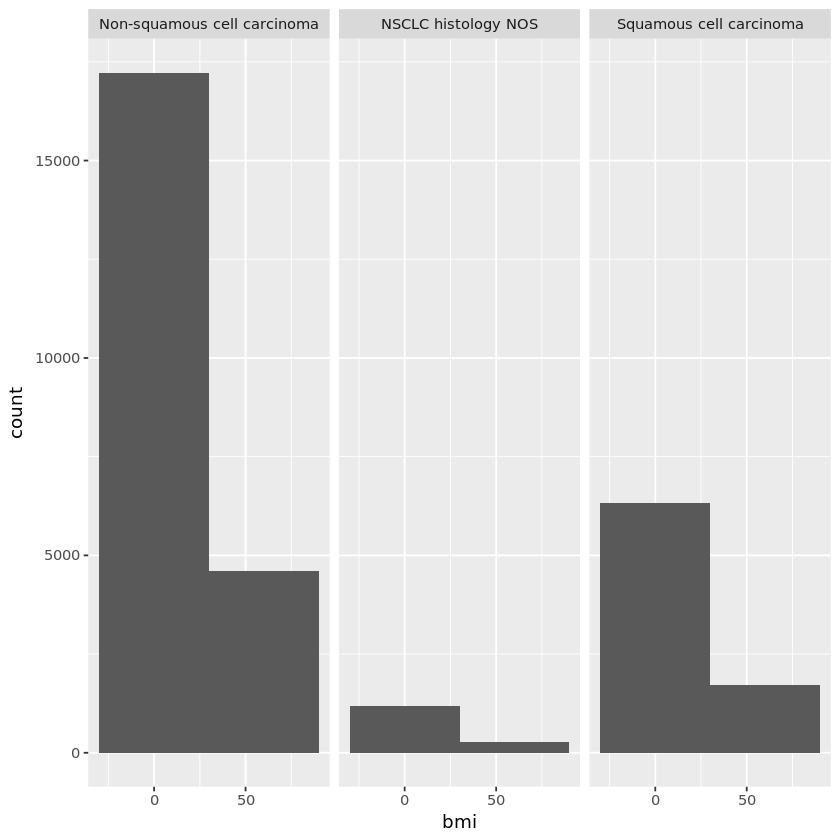

In [189]:
#Faceted histogram plot of bmi faceted by histology
ggplot(flatiron_select, aes(x = bmi)) + geom_histogram(binwidth = 60) + facet_wrap(~ histology)

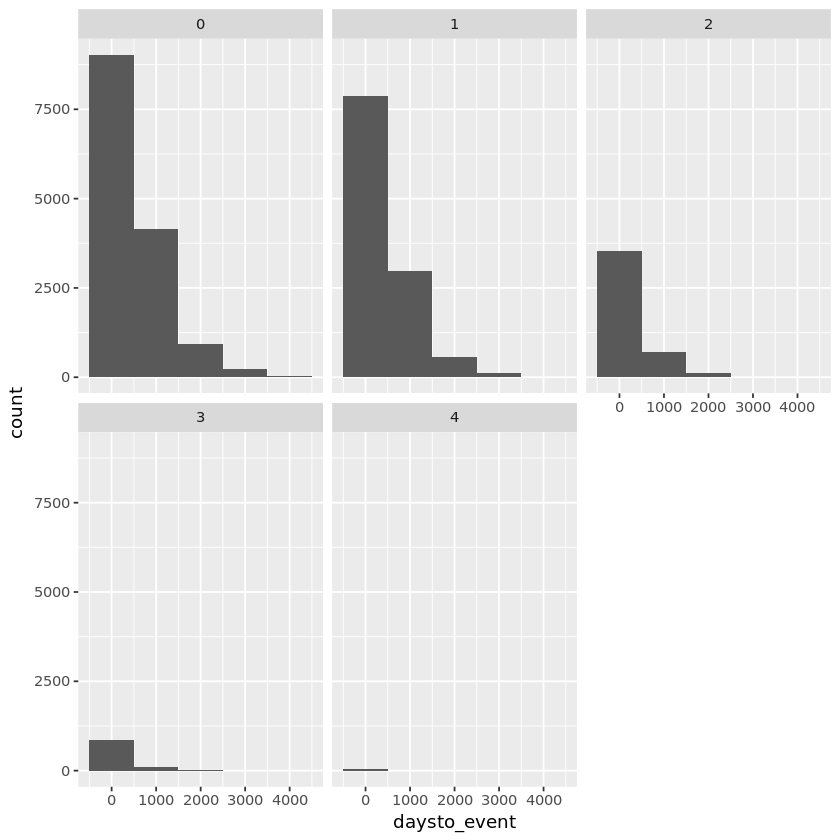

In [195]:
#Faceted histogram plot of number of "daystoevent" faceted by ecog
ggplot(flatiron_select, aes(x = daysto_event)) + geom_histogram(binwidth = 1000) + facet_wrap(~ ecog)

__Time to event decreases significantly as the ecog score increases (i.e. as the patient's performance score gets worse__)

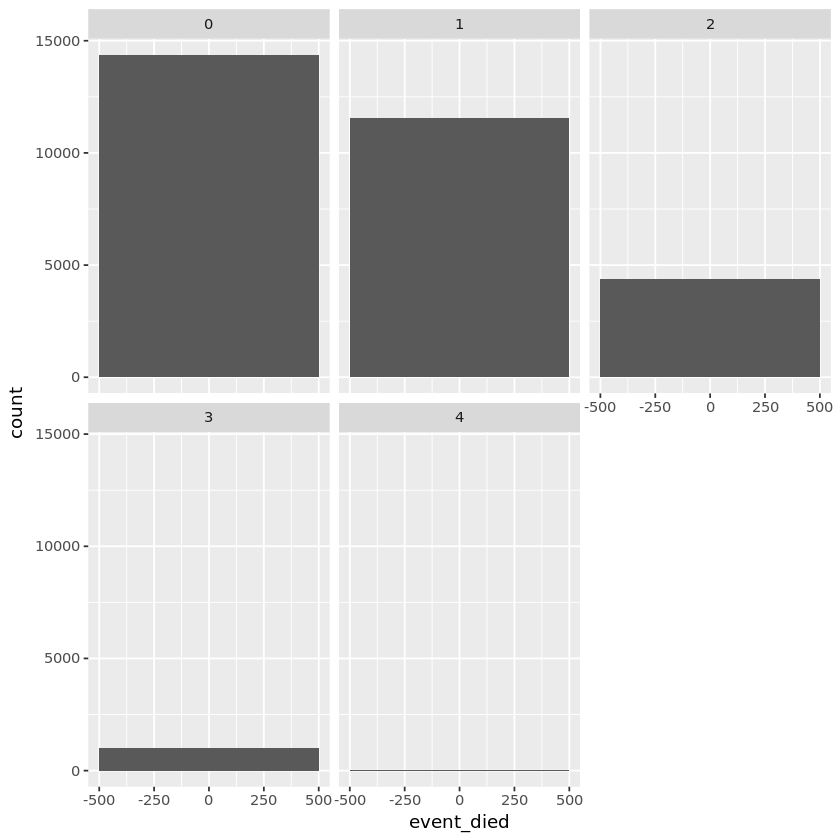

In [200]:
#Faceted histogram plot of number of eventoutcome faceted by ecog - REMOVE., NOT VERY USEFUL
ggplot(flatiron_select, aes(x = event_died)) + geom_histogram(binwidth = 1000) + facet_wrap(~ ecog)

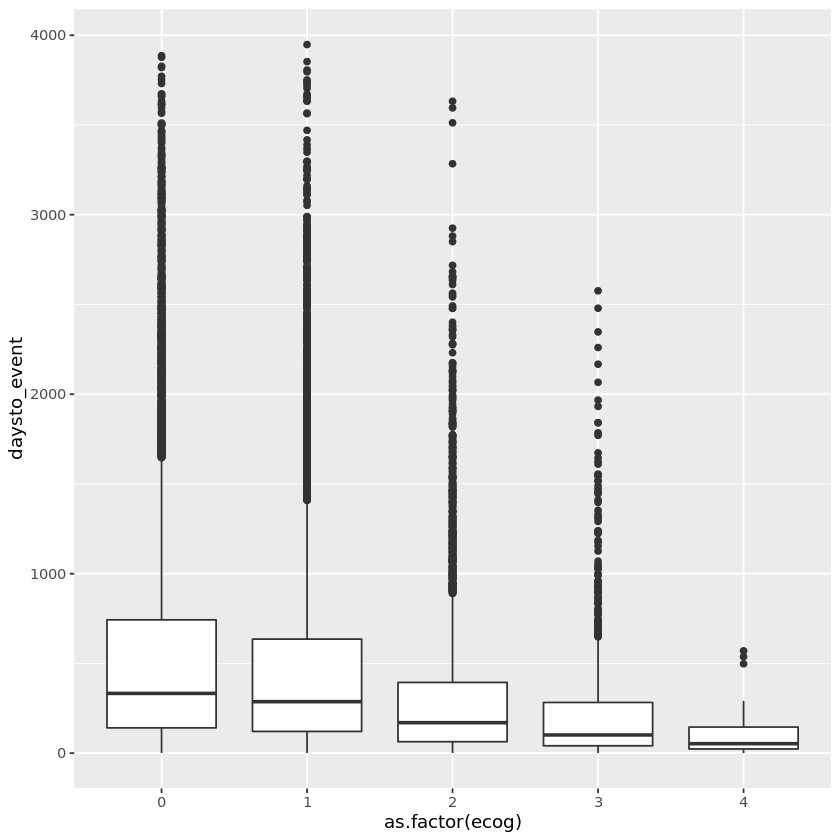

In [198]:
#Boxplot of pt performance status (ecog) against time to event
ggplot(flatiron_select, aes(x = as.factor(ecog), y = daysto_event)) + geom_boxplot()